**Roman Schiffino**

Spring 2024

CS 251: Data Analysis and Visualization

In [483]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

from data import *
import linear_regression

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Project 3 | Linear Regression

## AI Policy

To improve the quality of your learning and out of fairness to your hardworking classmates, AI (e.g. ChatGPT, Copilot, etc.) should NOT be used in ANY way on this project and extensions. This includes both written analysis, plotting, and code. I will only grade your work, not the AI's. I will stop grading your project if I notice AI-generated content (in any capacity).

## Notes

In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:
- `np.linalg.inv`
- `scipy.linalg.lstsq` (in `LinearRegression::linear_regression_scipy` only).
- `np.linalg.norm`
    
**NOTE:** The numpy functions that you have been using so far are fine to use.

## Task 1: Run a linear regression

In this task, you will implement linear regression then analyze and plot the results on the Iris dataset. 

### 1a. Import Iris data

- In the below cell, load in the Iris dataset into a `Data` object.
- Print out the object (only showing the first few data samples).
- Create an `LinearRegression` object called `lin_reg` based on the `Data` object that you just created.

In [484]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
print(iris_data)
lin_reg = linear_regression.LinearRegression(iris_data)

Reading data from file: data/iris.csv
Data extracted from file. 
Now processing data...

Data processing complete!

Row count: 150
Order: 2
┌──────────────┬─────────────┬──────────────┬─────────────┬────────────────┐
│ sepal_length │ sepal_width │ petal_length │ petal_width │    species     │
├──────────────┼─────────────┼──────────────┼─────────────┼────────────────┤
│     5.1      │     3.5     │     1.4      │     0.2     │  setosa (0.0)  │
│     4.9      │     3.0     │     1.4      │     0.2     │  setosa (0.0)  │
│     4.7      │     3.2     │     1.3      │     0.2     │  setosa (0.0)  │
│     4.6      │     3.1     │     1.5      │     0.2     │  setosa (0.0)  │
│     5.0      │     3.6     │     1.4      │     0.2     │  setosa (0.0)  │
│     ...      │     ...     │     ...      │     ...     │      ...       │
│     5.9      │     3.0     │     5.1      │     1.8     │virginica (2.0) │
└──────────────┴─────────────┴──────────────┴─────────────┴────────────────┘


Your code should print something that looks like this:

    -------------------------------
    data/iris.csv (150x5)
    Headers:
    sepal_length	sepal_width	petal_length	petal_width	species
    -------------------------------
    Showing first 5/150 rows.
    5.1	3.5	1.4	0.2	0.0
    4.9	3.0	1.4	0.2	0.0
    4.7	3.2	1.3	0.2	0.0
    4.6	3.1	1.5	0.2	0.0
    5.0	3.6	1.4	0.2	0.0

### 1b. Solve for the linear regression slopes and intercept

Implement the `linear_regression` method to solve the regression model $$\vec{y} = A\vec{c}$$ for the unknown coefficient vector $\vec{c}$. Recall in this equation:
- $A$ is the data matrix of independent variables selected for the regression shape=(`num_data_samps`, `num_ind_vars+1`) with an extra column of 1s tacked on for the intercept.
- $\vec{c}$ is the vector of unknown regression coefficients associated with each independent variable (slopes + intercept) shape=(`num_ind_vars+1`, 1)
- $\vec{y}$ is the dependent variable column vector shape=(`num_data_samps`, 1)

**Tips:**
- The docstring for `linear_regression` instructs you to set all the instance variables. For now, focus on computing $\vec{c}$ (slopes and intercept) and put off computing $R^2$ and the residuals. Use the test code below to help you debug.

#### Test `linear_regression` with one independent variable

In [485]:
lin_reg.linear_regression(['sepal_length'], 'petal_length')

print(f'Your regression fitted slope coefficients have shape\n{lin_reg.slope.shape}\nand the shape should be\n(1, 1)')
print(f'Your regression fitted slope coefficient is\n{lin_reg.slope[0, 0]:.4f}\nand it should be\n1.8584')
print(f'Your regression fitted intercept is\n{lin_reg.intercept:.4f}\nand it should be\n-7.1014')

Your regression fitted slope coefficients have shape
(1, 1)
and the shape should be
(1, 1)
Your regression fitted slope coefficient is
1.8584
and it should be
1.8584
Your regression fitted intercept is
-7.1014
and it should be
-7.1014


#### Test `linear_regression` with multiple independent variables

In [486]:
iris_headers = iris_data.get_headers()
lin_reg.linear_regression(iris_headers[:3], iris_headers[4])

print(f'Your regression fitted slope coefficients have shape\n{lin_reg.slope.shape}\nand the shape should be\n(3, 1)')
print(f'Your regression fitted slope coefficients are\n{lin_reg.slope[:, 0]}\nand it should be\n[-0.23818  0.09568  0.54794]')
print(f'Your regression fitted intercept is\n{lin_reg.intercept:.4f}\nand it should be\n0.0401')

Your regression fitted slope coefficients have shape
(3, 1)
and the shape should be
(3, 1)
Your regression fitted slope coefficients are
[-0.23818  0.09568  0.54794]
and it should be
[-0.23818  0.09568  0.54794]
Your regression fitted intercept is
0.0401
and it should be
0.0401


### 1c. Predict y values from fitted regression model

Implement the `predict` method: Use fitted linear regression model coefficients to make predictions based on the data.

#### Test `predict` with fitted data

In [487]:
iris_data_pred = Data(iris_filename)
iris_data_pred.limit_samples(100, 105)
iris_headers = iris_data_pred.get_headers()

lin_reg_pred = linear_regression.LinearRegression(iris_data_pred)
lin_reg_pred.linear_regression(iris_headers[:2], iris_headers[3])
y_pred = lin_reg_pred.predict()

print(f'Your model y predictions are\n{np.squeeze(y_pred)} and should be\n[2.48684 1.81579 2.06842 2.01316 2.11579]')
print(f'Your model y predictions shape is\n{y_pred.shape} and should be\n(5, 1)')

Reading data from file: data/iris.csv
Data extracted from file. 
Now processing data...

Data processing complete!

Your model y predictions are
[2.48684 1.81579 2.06842 2.01316 2.11579] and should be
[2.48684 1.81579 2.06842 2.01316 2.11579]
Your model y predictions shape is
(5, 1) and should be
(5, 1)


#### Test `predict` with novel data

In [488]:
np.random.seed(0)
# fake test data: 3 data samples, 4 dimensional.
test_slope = np.random.normal(size=(5, 1))
test_X = np.random.normal(size=(3, 5))
lin_reg.slope = test_slope
lin_reg.intercept = np.pi
y_pred = lin_reg.predict(test_X)
print(f'Your model y predictions are\n{np.squeeze(y_pred)} and should be\n[2.18518 5.82409 3.23376]')
print(f'Your model y predictions shape is\n{y_pred.shape} and should be\n(3, 1)')

Your model y predictions are
[2.18518 5.82409 3.23376] and should be
[2.18518 5.82409 3.23376]
Your model y predictions shape is
(3, 1) and should be
(3, 1)


### 1d. Compute linear regression statistics

Implement the following methods then call them from `linear_regression` to compute all the class instance variables from within `linear_regression`.

- `r_squared`: Quality of fit metric for linear regression. See $R^2$ equation below.
- `compute_residuals`: Compute the difference between the regression model predictions and the actual dependent variable values (residuals).
- `compute_mse`: Computes the mean squared error in the predicted y compared the actual y values (see MSE equation below).

**$R^2$ Equation:** $$1 - \frac{E}{S}$$ where $$E = \sum_i \left (y_i - \hat{y}_i \right )^2$$ and $$S =  \sum_i \left (y_i - \bar{y} \right )^2$$ where $y_i$ are the dependent variable values, $\bar{y}_i$ is the mean of the dependent variable values, $\hat{y}_i$ is the y values *predicted* by the regression.

**Equation for MSE:** $$E = \frac{1}{N}\sum_{i=1}^N \left (y_i - \hat{y}_i \right )^2$$

#### Test `linear_regression` method with $R^2$ and residuals

In [489]:
lin_reg.linear_regression(['sepal_length'], 'petal_width')

# test shapes of instance variables
print(f'Shape of your A data array is\n{lin_reg.A.shape} and should be\n(150, 1)')
print(f'Shape of your y dep var vector is\n{lin_reg.y.shape} and should be\n(150, 1)\n')
print(f"Your independent variables are:\n{lin_reg.ind_vars}\nand should be:\n['sepal_length']")
print(f'Your dependent variables are:\n{lin_reg.dep_var}\nand should be:\npetal_width\n')
print(f'Shape of your slope fits are {lin_reg.slope.shape} and should be (1, 1)')

# Test specific values
print(f'Your slope is {lin_reg.slope} and should be [[0.75292]]')
print(f'Your intercept is {lin_reg.intercept:.2f} and should be -3.20')
print(f'Your R^2 is {lin_reg.R2:.2f} and should be 0.67')
print(f'Your 1st few residuals are\n{lin_reg.residuals[:5].T} and should be\n[[-0.43966 -0.28908 -0.1385  -0.06321 -0.36437]]')

Shape of your A data array is
(150, 1) and should be
(150, 1)
Shape of your y dep var vector is
(150, 1) and should be
(150, 1)

Your independent variables are:
['sepal_length']
and should be:
['sepal_length']
Your dependent variables are:
petal_width
and should be:
petal_width

Shape of your slope fits are (1, 1) and should be (1, 1)
Your slope is [[0.75292]] and should be [[0.75292]]
Your intercept is -3.20 and should be -3.20
Your R^2 is 0.67 and should be 0.67
Your 1st few residuals are
[[-0.43966 -0.28908 -0.1385  -0.06321 -0.36437]] and should be
[[-0.43966 -0.28908 -0.1385  -0.06321 -0.36437]]


#### Test MSE

In [490]:
# Test with iris data
lin_reg_norm = linear_regression.LinearRegression(iris_data)
lin_reg_norm.linear_regression(['sepal_length'], 'petal_width')
print(f'Your Iris MSE is {lin_reg_norm.compute_mse():.2f} and should be 0.19')

Your Iris MSE is 0.19 and should be 0.19


## Task 2: Visualize linear regression

### 2a. Update `scatter` to support visualizing linear regression results

Implement `scatter` in `linear_regression.py`: Call your `Analysis::scatter` method to make the scatter plot, then handle overlaying the regression line in `LinearRegression::scatter`. **Run test code below.**

#### Test  `scatter` with linear regression

Only run this when you're done implementing all the methods thru `linear_regression`. This should produce:
- A scatter plot with a linear regression line that looks like it makes sense.
- There should be a title with the text "Regression on Iris!" and the $R^2$ value.

Reading data from file: data/iris.csv
Data extracted from file. 
Now processing data...

Data processing complete!


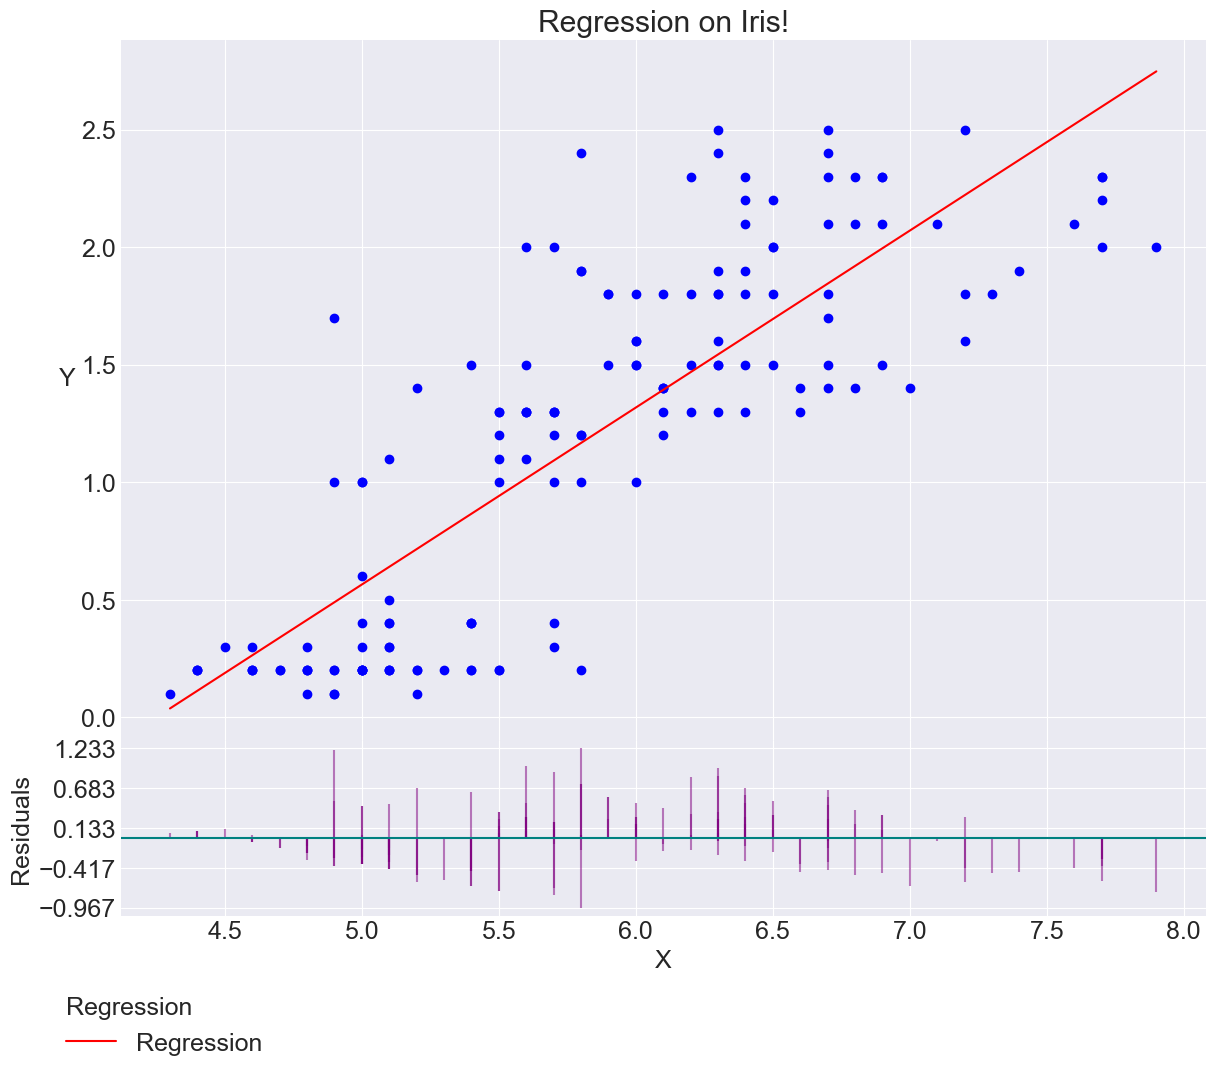

In [491]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
lin_reg = linear_regression.LinearRegression(iris_data)
lin_reg.linear_regression(['sepal_length'], 'petal_width')

lin_reg.scatter('sepal_length', 'petal_width', 'Regression on Iris!', operand=lin_reg.operand, residuals_on=True)
lin_reg.show()

### 2b. Update `pair_plot` to add regression lines to each scatter plot

#### Test `pair_plot()`

- Write `pair_plot()` in `linear_regression.py` that calls `Analysis::pair_plot` and extends it  to compute and plot the regression line for each scatter plot (all pairs of variables). For now, you can ignore the keyword argument `hists_on_diag`. **Run test code below.**

Executing the cell below should produce:
- A 5x5 grid of scatter plots.
- (*new*) regression lines in each scatter plot. The title of each subplot should have the $R^2$ value.
- Only 1st column has y axis labels.
- Only last column has x axis labels.

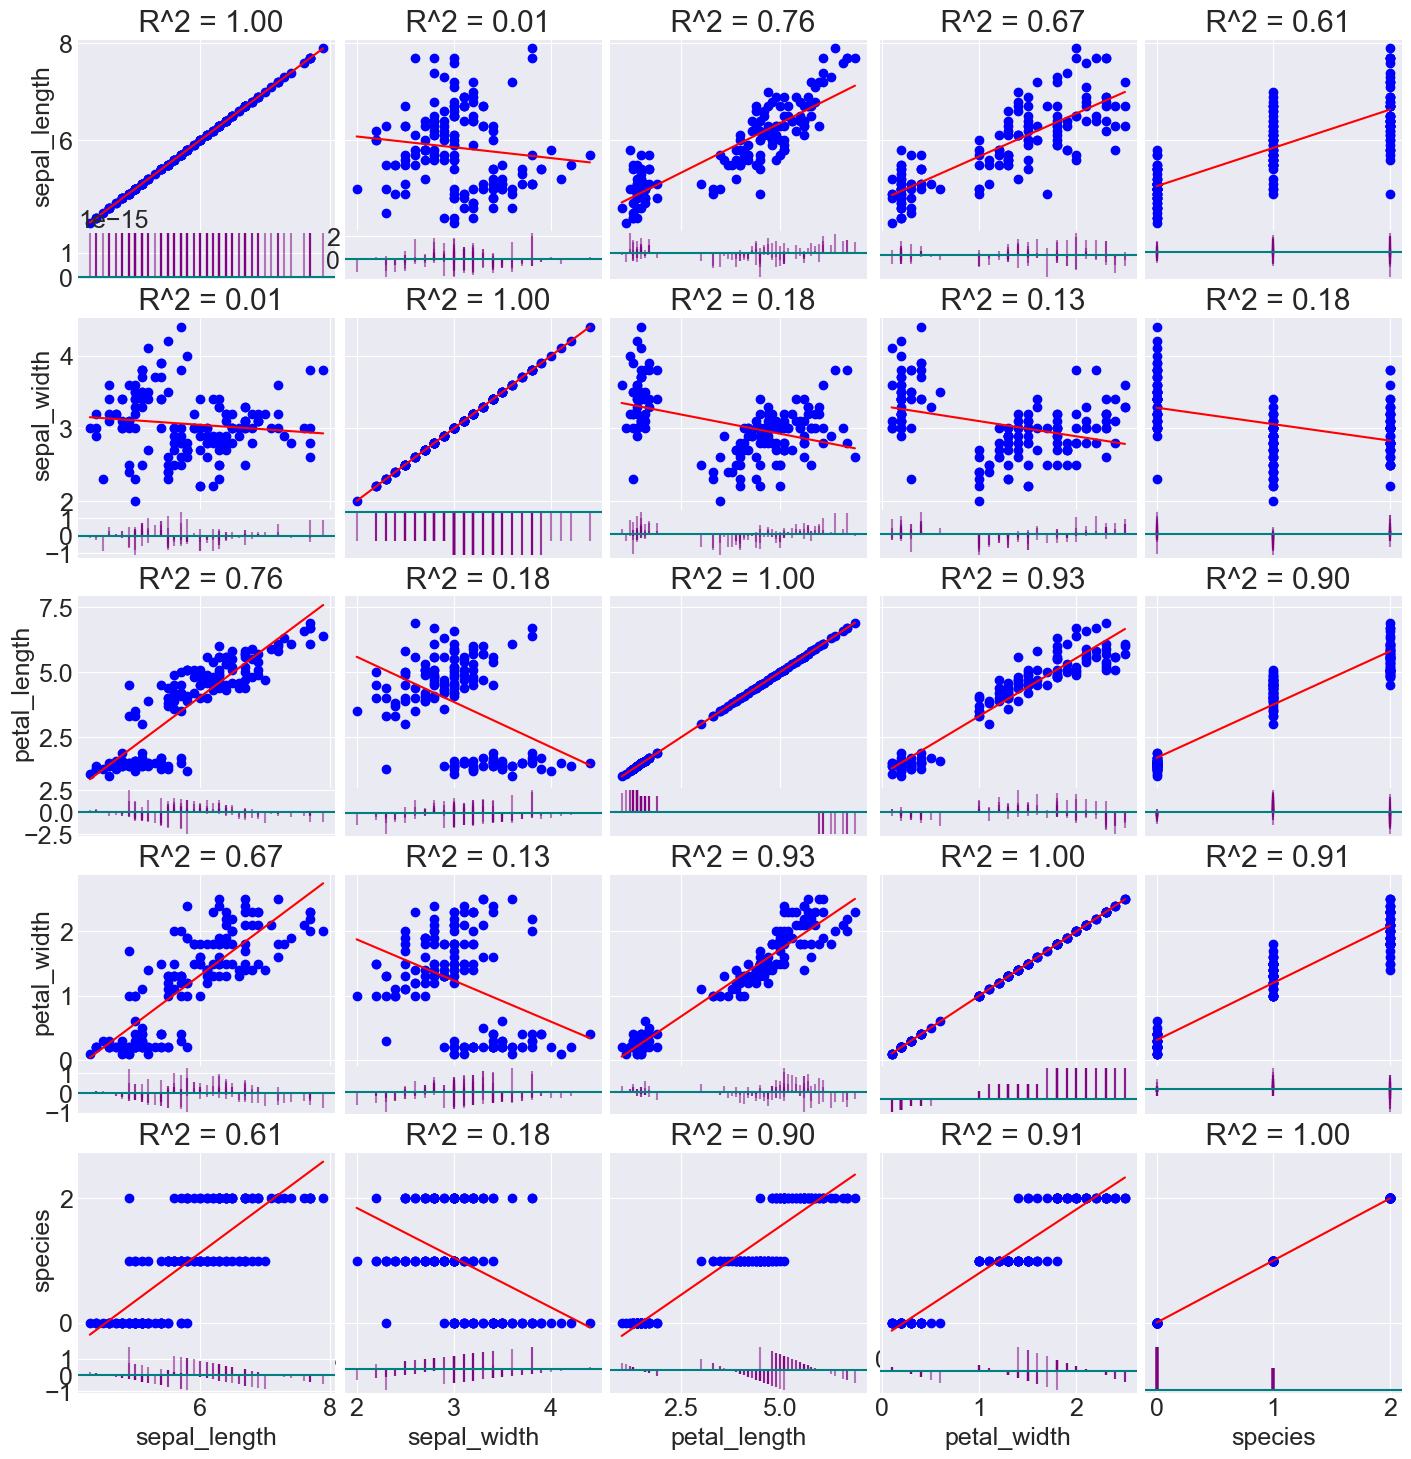

In [492]:
plt.close('all')
rcs = plt.rcParams
rcs['figure.max_open_warning'] = 30
lin_reg.pair_plot(iris_data.get_headers(), hists_on_diag=False)

### 2c. Questions

**Reminder:** You should not use AI in projects, including in your answers to questions.

**Question 1:** How helpful are the regressions plotted along the main diagonal (i.e. going from top-left to bottom-right) toward furthering our understanding of relationships in the dataset? **Why?**

**Answer 1:**

They are not at all useful it is a trivial note that the relationship between a variable and itself is perfectly one to one, $R^2 = 1$, slope = 1, and intercept = 0 etc.
Wuite simply its useless data as  its the correlation of a variable with respect to itself. $\frac{dx}{dx}=1$

**Question 2:** Does it make sense to interpret the linear regressions involving the categorical variable (species)? **Why or why not?**

*Hint: Think about the coding of species levels.*

**Answer 2:** 

For the most part, no. Categorical variables are such that if the independent variable is a categorical variable, then the slope of the regression line is the average difference in the mean of the dependent variable across the categories. This is not a useful measure of the relationship between the two variables. However, it still has some value as it can be used to compare the average of the dependent variable across the categories. Similarily the $R^2$ value can be used to compute the average variance of the dependent variable across the categories. However, this is no more useful than the standard deviation.

On the other hand if category is the dependent variable then the slope of the regression line has some (minimal) potential in determining a binning function, but again this is really no more useful than the standard deviation.

**Question 3:** Not counting the relationships on the main diagonal and those involving the `species` categorical variable, identify potential relationships in the dataset. Which variables appear to be most strongly related? Which variables appear least likely to be related?

**Answer 3:** 

Quite clearly the petal length and petal width are the most strongly related. This is evident by the fact that the $R^2$ value is 0.93. The next most correlated varilable is the petal length and sepal length with an $R^2$ value of 0.76. Followed rather closely by petal width and sepal length with an $R^2$ value of 0.67. The least correlated variables are the sepal length and sepal width with an $R^2$ value of 0.01. The sepal width and petal width are the next least correlated with an $R^2$ value of 0.13. Then finally the petal length and sepal width ring in with an $R^2$ value of 0.18. 

This makes sense considering that if petal length and petal width are highly correlated then it would make sense that given the next highest correlation is petal length and sepal length then that petal width and sepal width would be at least moderately related as well. 
Then considering sepal width and sepal length are seemingly compoletely unrelated it would make sense that the petal length and sepal width would be the next least correlated. This is because it would be impossible for petal length and sepal length to be correlated and for petal length and sepal width to be correlated if sepal width and sepal length are not correlated, cocorrelation and such.

### 2d. Adding histograms to `pair_plot`

Update your `pair_plot` code to place a histogram along the main diagonal of the `pair_plot` grid (rather than a scatter plot). Do this when the keyword argument `hists_on_diag` is set to `True`. Use (*or adapt*) the following code snippet right before plotting the histogram on row `i` and column `j` of your pair plot. *This code makes the x and y axis scaling different for the histograms (not shared with the scatter plots)*.

```python
numVars = len(data_vars)
axes[i, j].remove()
axes[i, j] = fig.add_subplot(numVars, numVars, i*numVars+j+1)
if j < numVars-1:
    axes[i, j].set_xticks([])
else:
    axes[i, j].set_xlabel(data_vars[i])
if i > 0:
    axes[i, j].set_yticks([])
else:
    axes[i, j].set_ylabel(data_vars[i])
```


Executing the cell below should produce:
- A 5x5 grid of scatter plots (histograms along main diagonal).
- Regression lines in each scatter plot. The title of each subplot should have the $R^2$ value.
- Only 1st column has y axis labels.
- Only last column has x axis labels.

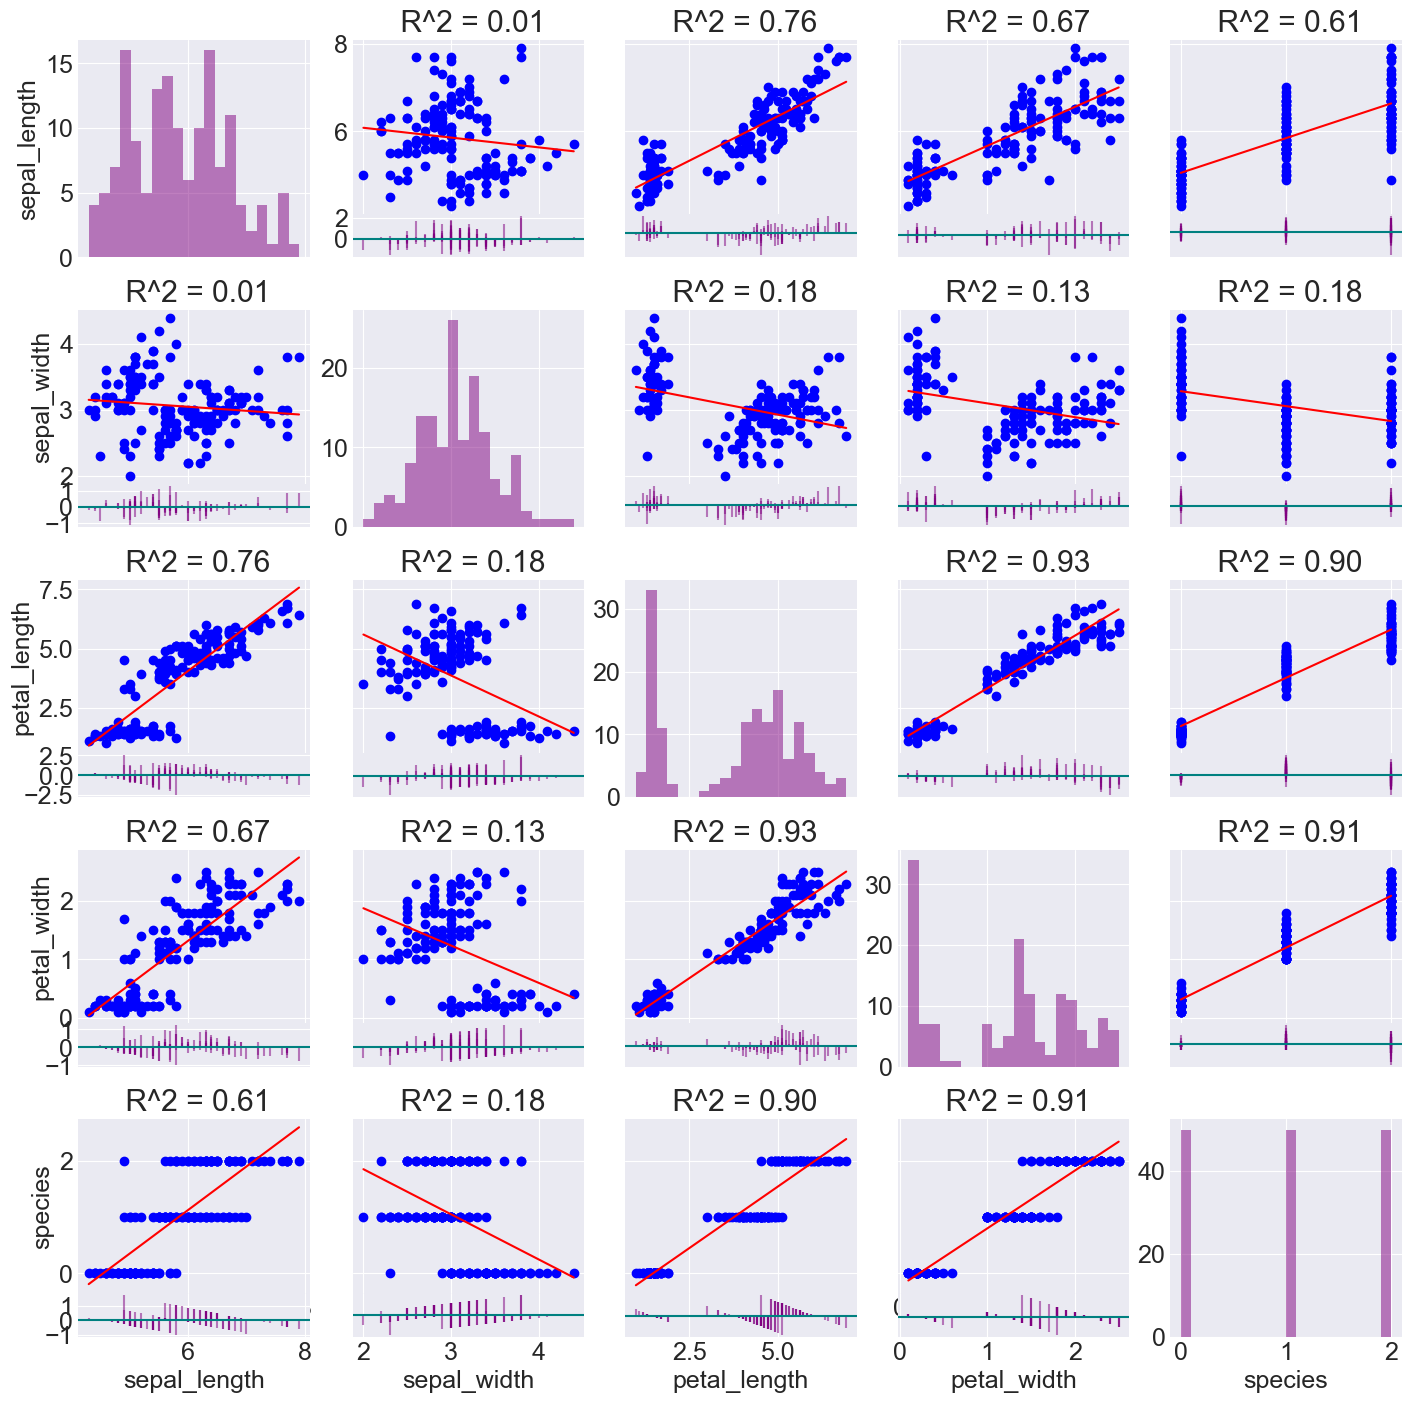

In [493]:
lin_reg.pair_plot(iris_data.get_headers(), hists_on_diag=True)

### 2e. Questions

**Question 4:** Make two observations about the dataset that the histograms help reveal.

**Answer 4:**

Each of the histograms seems to be a sum of normal distributions. This is evident by the fact that the histograms are bell (or multi-bell) shaped, and have the same amount of samples per species. Estimating a bit on the math we can note that one of the species forms a data cluster by having consistently lower values than the other two species for petal length and width, as well as a smaller standard deviation. On the other hand we note that sepal length and width are more or less normally distributed. Here those seemingly useless scatter plots for the categorical variables demonstrate some value as we can estimate data spread and see how that is propogated in the other charts, with more normal or multi-peaked distributions.

## Extensions

### 1. Implementation of Various more Complex Regression Models:

I implemented several regressison models in the `linear_regression` class. These include:
- Linear Regression
- Polynomial Regression
- Multivariate Polynomial Regression
- Multiple Exponential Regression
- Sigmoidal Regression
The hardest of these to implement was the multiple-exponential regression as it required me to write an integral calculator, in reality this was just a relatively simple trapezoidal Riemann sum calculator, nevertheless it was difficult. Furthermore, there were such odd behaviors from the functions that I had to account for to make it work for general non-perfect data. I had to transform the data such that x_min was mapped to x=0, I had to reference a paper I found on the subject in order to ralize that in coefficient calculation I would need to account for the integration I had done by messing with the y-data coefficients, I was getting different answers from pinv() and lstsq(), etc.

The sigmoidal regression, which i honestly just called a sine regression was also quite difficult as it required me to figure out exactly how scipy implemented their fast fourier transform. However, I was able to figure it out and implement it in a way that was quite fast and accurate. 

Multivariate polynomial was super easy as I just had to use the same code as the polynomial regression, but with a different A matrix. However, graphing for these functions was a bit of pain as well as I had to figure out how to graph the functions in a useful way. Obviously the first option was with a 3D graph and while I did that it took a while. 

Finally, I integrated all of these into a built in general regression function that would take in a string and then call the appropriate function. What's nice is that by creating the LeftOperand class I was able to tremendously simplify that code, and it was super easy to calculate all the values and whatnot. This regression function also meshes well with scatter and pair_plot as it can be called from those functions as well. 

To demonstrate:

Reading data from file: data/iris.csv
Data extracted from file. 
Now processing data...

Data processing complete!


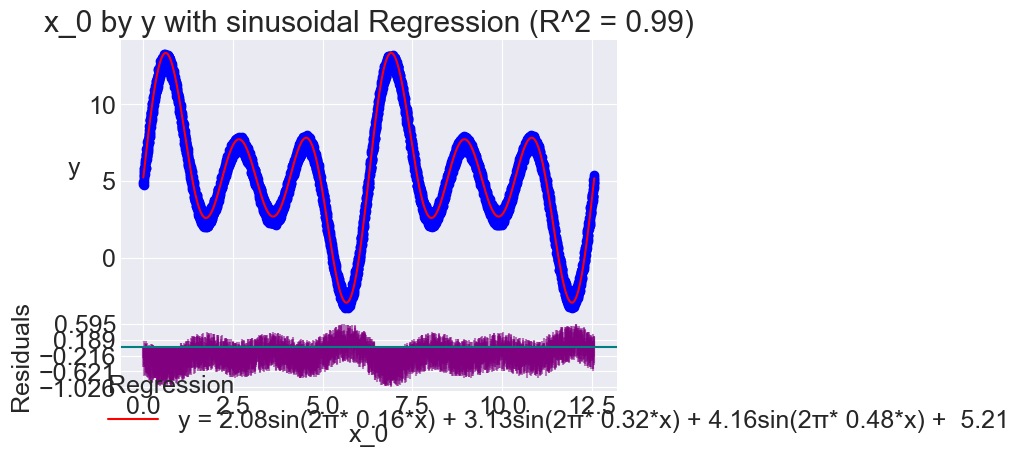

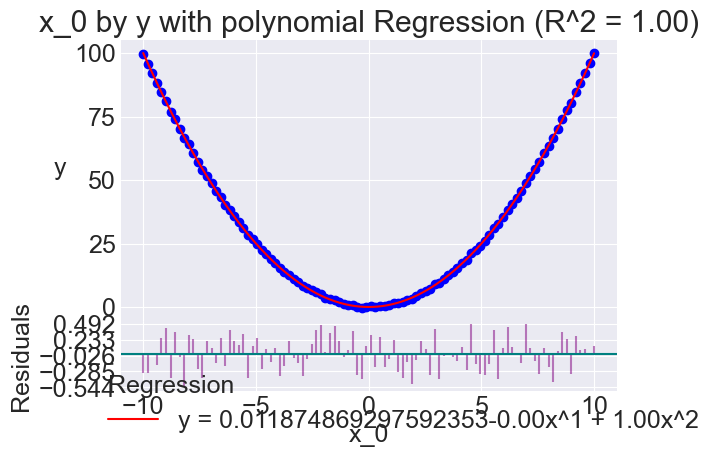

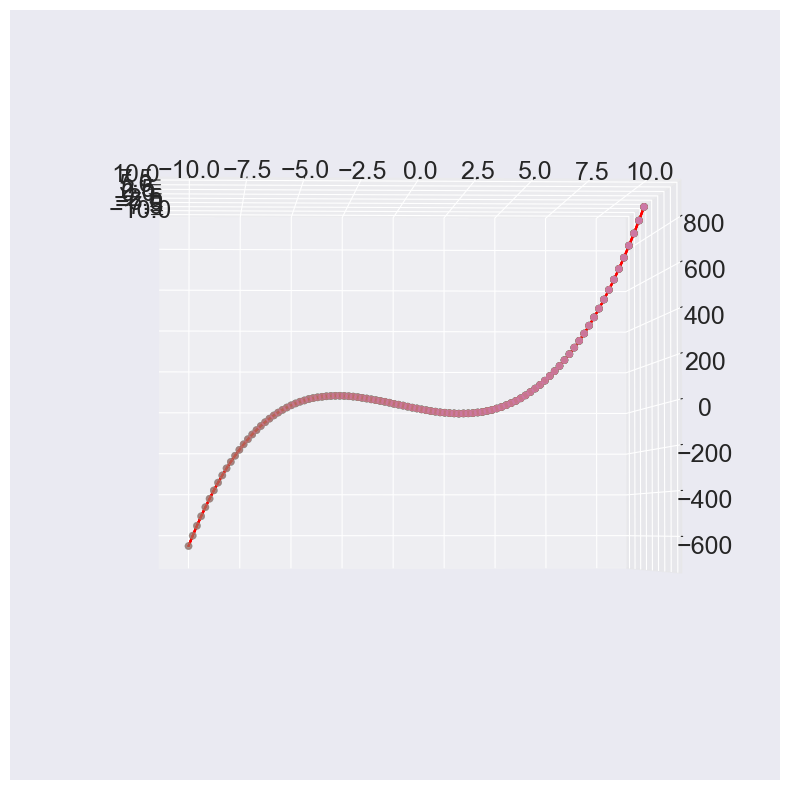

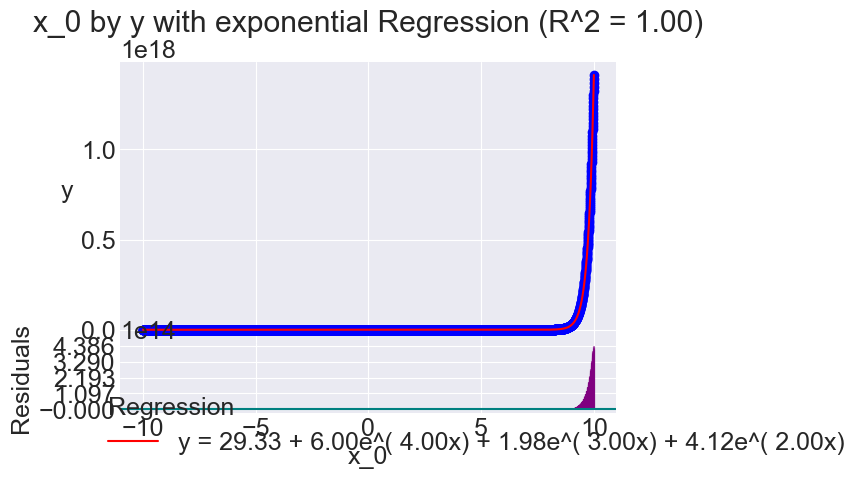

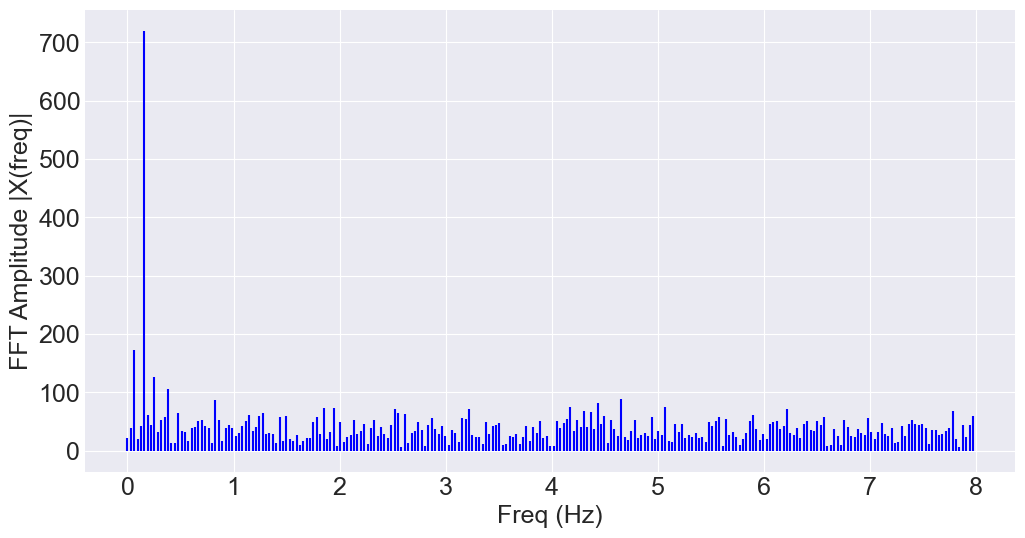

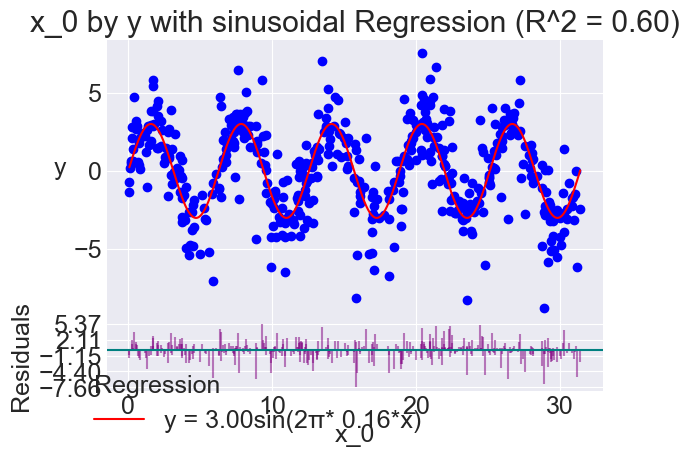

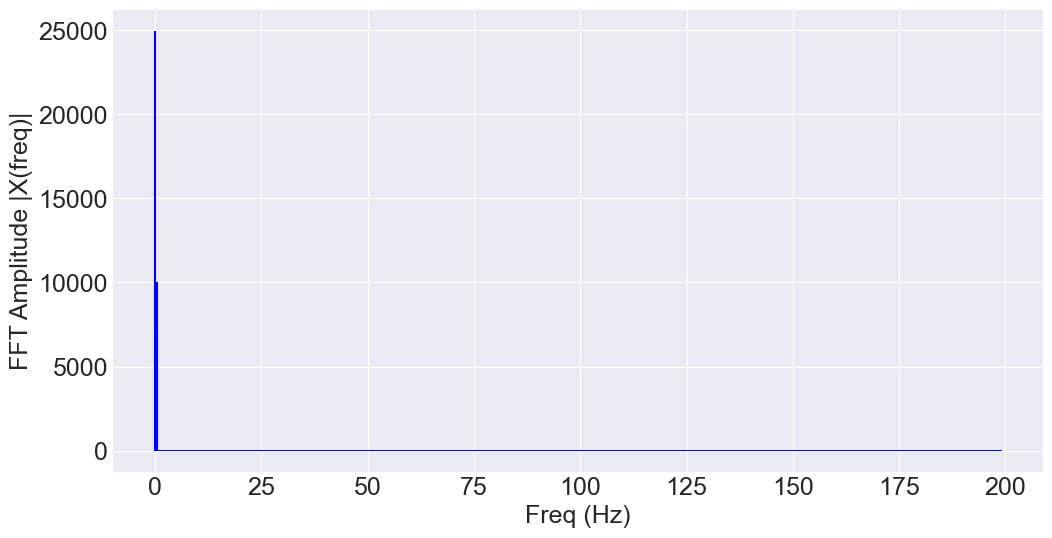

In [ ]:
from linear_regression import LinearRegression
from regressTypes import RegressTypes
import matplotlib.animation as animation

data = Data('data/iris.csv')
analysis = LinearRegression(data)
# Create a simple linear function y = 2x^2 + 3
x_ = np.linspace(0, 10, 500)
y_ = 2 * x_ ** 2 + 3



# Perform sinusoidal regression
data = np.genfromtxt("Lab03a/data/mystery_data_1.csv", delimiter=",")[2:]


x_dat = data[:, 0]
y_dat = data[:, 1]
analysis.regression(x_dat, y_dat, RegressTypes.sinusoidal, 1, plot_on=True)

x_m = np.linspace(0, 4 * np.pi, 5000)
y_m = 2 * np.sin(x_m) + 3 * np.sin(2 * x_m) + 4 * np.sin(3 * x_m) + 5 + np.random.uniform(-0.5, 0.5, 5000)
analysis.regression(x_m, y_m, RegressTypes.sinusoidal, 4, plot_on=True)


# Get fitted slope and intercept
x_mm = np.linspace(-10, 10, 100)
z_mm = np.linspace(-10, 10, 100)
y_mm = x_mm ** 2 + np.random.uniform(-0.5, 0.5, 100)
analysis.regression(x_mm[:, np.newaxis], y_mm[:, np.newaxis], RegressTypes.polynomial, 2, plot_on=True)




y_mm = x_mm ** 2 + z_mm * (z_mm - 5) * (z_mm + 5) + np.random.uniform(-0.5, 0.5, 100)
zloperand = np.column_stack([x_mm[:, np.newaxis], z_mm[:, np.newaxis]])
oper, lab = analysis.multi_poly_regression(zloperand, y_mm[:, np.newaxis], 3)
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": '3d'})
# fig.interactive(True)
ax.scatter3D(x_mm, z_mm, y_mm)
ax.plot3D(x_mm, z_mm, np.squeeze(oper | zloperand), "r", label=lab)

   
def init():
    ax.scatter3D(x_mm, z_mm, y_mm)
    ax.plot3D(x_mm, z_mm, np.squeeze(oper | zloperand), "r", label=lab)
    return fig,

def animate(i):
    ax.view_init(2*i, 3*i)
    return fig,


# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=5, blit=True)
# Save
anim.save('spins.mp4', fps=30, extra_args=['-vcodec', 'libx264'])


# Perform Exponential regression
x_m = np.linspace(-10, 10, 5000)
y_m = (30 + 2 * np.exp(3 * x_m) + 4 * np.exp(2 * x_m) + 6 * np.exp(4 * x_m) + np.random.uniform(-5, 5, 5000))
analysis.regression(x_m, y_m, RegressTypes.exponential, 3, plot_on=True)